In [1]:
import numpy as np
import pandas as pd

In [2]:
data_url = '/kaggle/input/full-hbo-max-dataset/data.csv'

In [3]:
df = pd.read_csv(data_url)
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517281.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443936.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104363.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259101.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,735374.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               5526 non-null   object 
 1   type                5754 non-null   object 
 2   genres              5628 non-null   object 
 3   releaseYear         5740 non-null   float64
 4   imdbId              5394 non-null   object 
 5   imdbAverageRating   5331 non-null   float64
 6   imdbNumVotes        5331 non-null   float64
 7   availableCountries  5754 non-null   object 
dtypes: float64(3), object(5)
memory usage: 359.8+ KB


In [5]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,5740.000000,5331.000000,5.331000e+03
mean,2013.759582,6.662521,6.921846e+04
std,11.961140,1.042661,1.934956e+05
min,1903.000000,1.500000,5.000000e+00
25%,2010.000000,6.000000,3.005000e+02
50%,2018.000000,6.700000,2.282000e+03
75%,2021.000000,7.400000,3.943700e+04
max,2025.000000,9.400000,2.961164e+06


In [6]:
df.columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

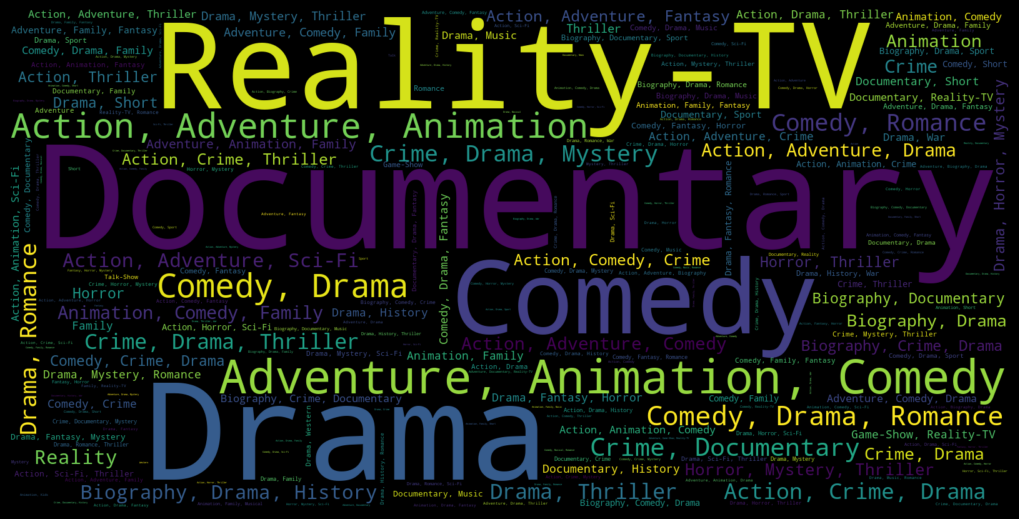

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["genres"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

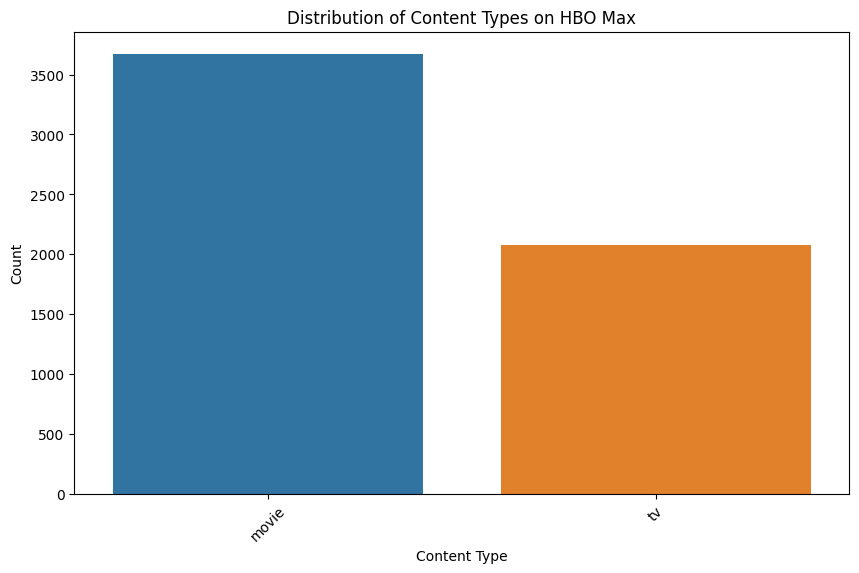

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Content Types on HBO Max')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

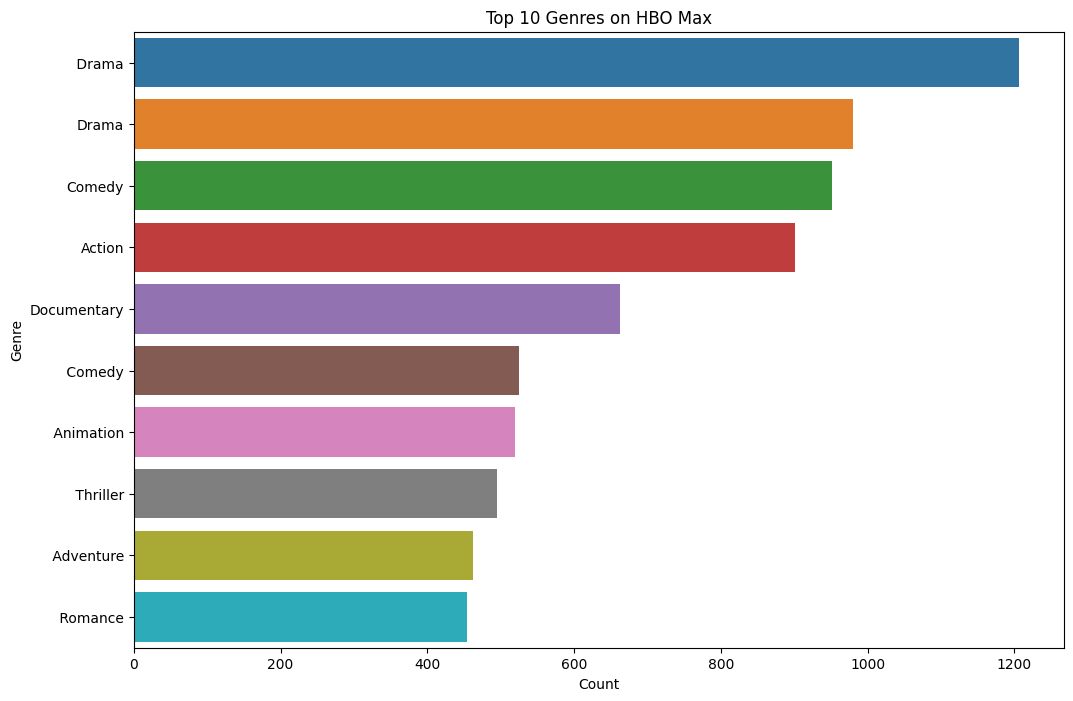

In [9]:
genre_series = df['genres'].dropna().str.split(',').explode()
genre_counts = genre_series.value_counts()

# Plot the top 10 genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index)
plt.title('Top 10 Genres on HBO Max')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()